### Importing libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
# !pip install -U kaleido
import kaleido

### Loading the dataset

In [46]:
dict_df = pd.read_csv("./dataset/data-dictionary.csv")
data = pd.read_csv("./dataset/Country-data.csv")

In [47]:
dict_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [48]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


### EDA

In [49]:
data.shape

(167, 10)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [51]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [52]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [53]:
print("No of countries present: ",data['country'].nunique())

No of countries present:  167


In [54]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


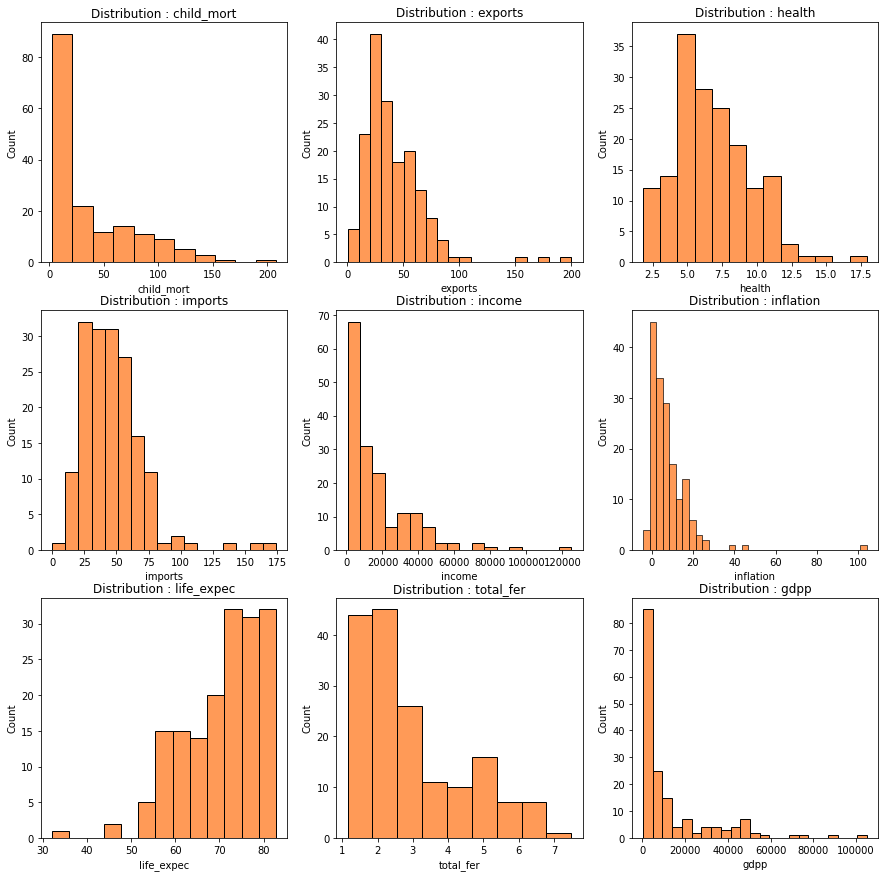

In [55]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
colors = ['#FF781F','#2D2926']
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.histplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

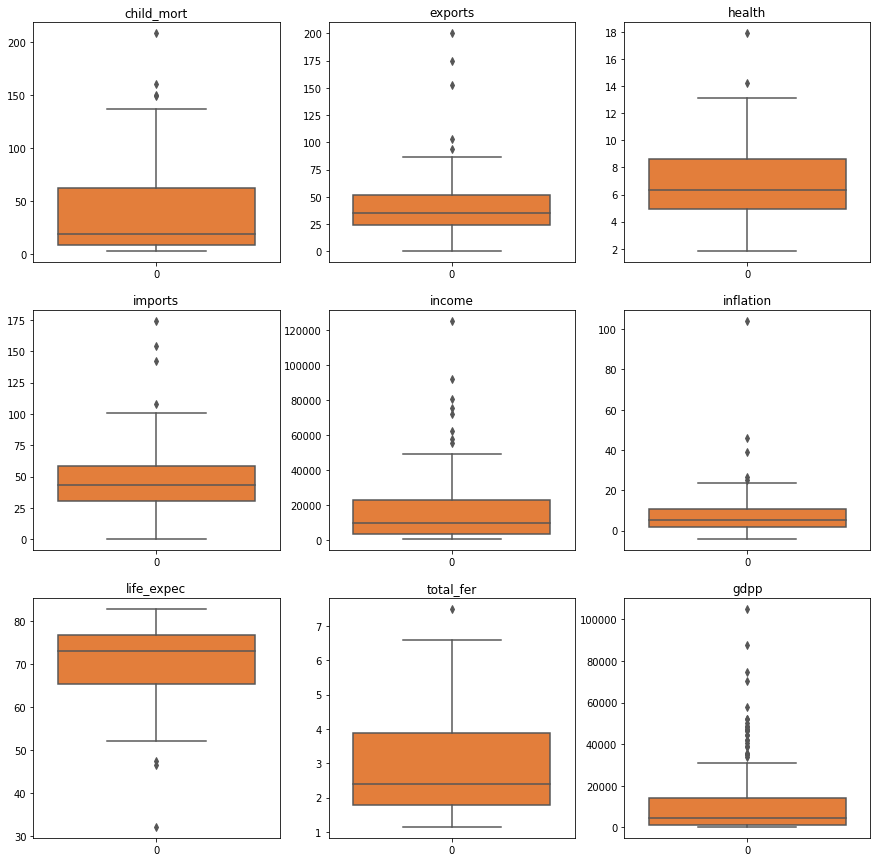

In [56]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data=data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

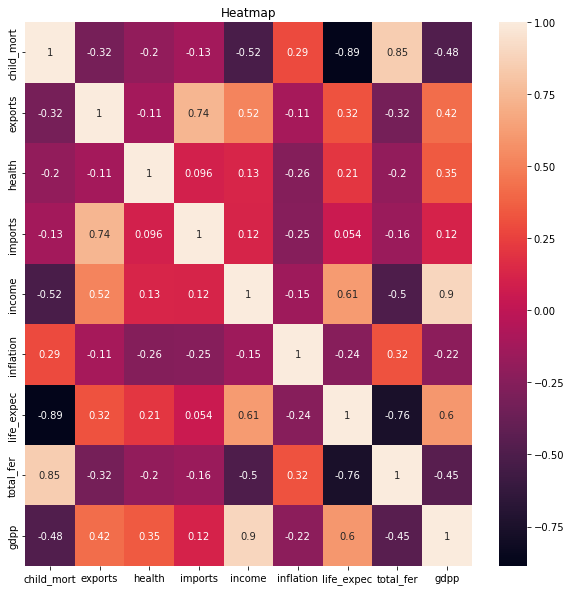

In [57]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap")
plt.show()

In [58]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24


In [59]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
ss = StandardScaler()
df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15


In [60]:
df2 = data.copy(deep = True)

col = list(data.columns)
col.remove('health'); col.remove('country')

df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True) 
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00
1,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04
2,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04
3,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03
4,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11


In [61]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

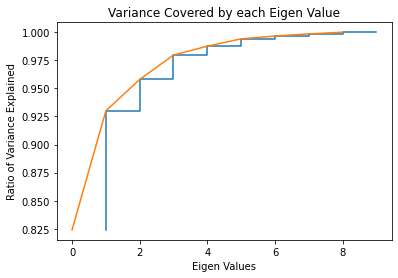

In [62]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [63]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.22,0.64,0.09
1,-0.08,-0.17,-0.21
2,-0.96,-0.13,-0.13
3,-1.51,0.47,0.28
4,-0.26,-0.24,-0.06


In [64]:
m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

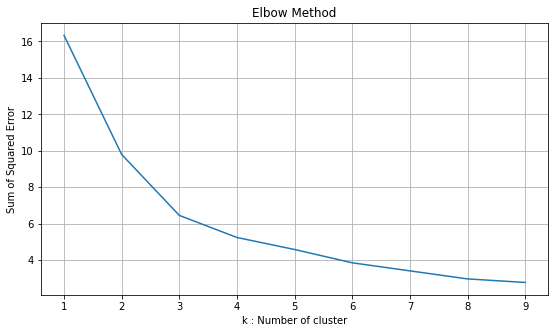

In [65]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

C:\Users\ryan1\AppData\Local\Temp\ipykernel_18180\1044214719.py:9: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



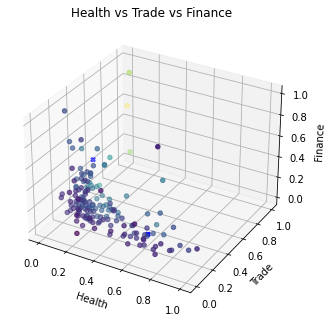

In [66]:
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels; df1['Class'] = labels

fig = plt.figure()
ax = Axes3D(fig)
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
ax.scatter(x,y,z,c = y)
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show()

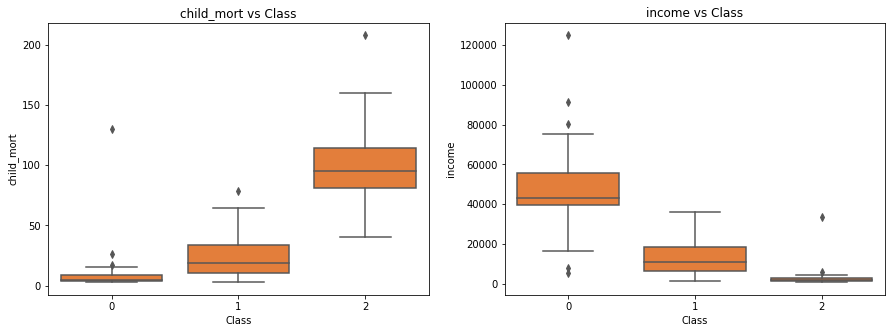

In [67]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

From the above plot we can conclude :

0 : No Help Needed

1 : Help Needed

2 : Might Need Help

In [68]:
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

C:\Users\ryan1\AppData\Local\Temp\ipykernel_18180\872790836.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
class_counts = df1['Class'].value_counts()

class_counts_with_labels = df1['Class'].map({0: 'No Help Needed', 1: 'Help Needed', 2: 'Might Need Help'}).value_counts()

print(class_counts)
print(class_counts_with_labels)

Help Needed        102
No Help Needed      36
Might Need Help     29
Name: Class, dtype: int64
Series([], Name: Class, dtype: int64)
